# HeatMap Analysis


In [ ]:
from tensorflow.keras.models import Model

# Define the heatmap layer index
heatmap_layer_index = 7

# Create a new model that outputs the feature maps and predictions
heatmap_model = Model(inputs=model.input, outputs=[model.layers[heatmap_layer_index].output, model.output])

# Load and preprocess the input image
input_image = cv2.imread('/content/drive/MyDrive/S6/Mini Project/Project v2 (PNCT)/v2 Dataset 5.1.1 (replaced with COVID-19 Radiography Dataset)/test/PNEUMONIA/VIRUS-4926863-0002.jpeg', cv2.IMREAD_GRAYSCALE)
input_image = cv2.resize(input_image, (150, 150))
input_image = input_image.astype(np.float32) / 255.0
input_image = input_image.reshape((1, 150, 150, 1))

# Get the feature maps and predictions from the heatmap model
feature_maps, predictions = heatmap_model.predict(input_image)
predicted_class = np.argmax(predictions)

# Get the weights of the last dense layer
weights = model.layers[-1].get_weights()[0]

1/1 [==============================] - 0s 186ms/step


In [ ]:
feature_maps.shape

(1, 34, 34, 128)

In [ ]:
weights_reshaped.shape

(1, 1, 1, 128)

In [ ]:
# Generate the heatmap
heatmap = np.dot(feature_maps[0], weights[..., predicted_class].squeeze())
heatmap = cv2.resize(heatmap, (input_image.shape[1], input_image.shape[2]))
heatmap = heatmap - np.min(heatmap)
heatmap = heatmap / np.max(heatmap)
heatmap = (heatmap * 255).astype(np.uint8)

In [ ]:
# Apply the colormap to the heatmap
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Overlay the heatmap on the input image
overlay = cv2.addWeighted(cv2.cvtColor(input_image.squeeze() * 255, cv2.COLOR_GRAY2BGR), 0.7, heatmap_color, 0.3, 0, dtype=cv2.CV_8U)

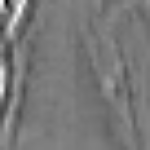

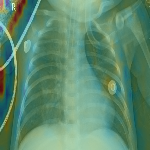

In [ ]:
from google.colab.patches import cv2_imshow

# Display the heatmap and overlay
cv2_imshow(heatmap)
cv2_imshow(overlay)

cv2.waitKey(0)
cv2.destroyAllWindows()